## Milestone1 Document
You must clearly outline your software design for the project.  Here are some possible sections to
include in your document along with some prompts that you may want to address.


**Introduction to Automatic Differentiation (AD)**

Derivatieves and their application in the form of differential equations is ubiquitous in each and every branch of engineering and especially in machine Learning. Machine learning is all about optimization of certain models we propose and finding the "best available" estimator given a certain objective function and given a defined domain or input. These task can very often be restated to finding the extrema of the objective functions or the zeros of the derivative of the objective function.

*Automatic differentiation (AD)*, also called *algorithmic differentiation* or simply *“autodiff”*, is a family of techniques similar to but more general than backpropagation for efficiently and accurately evaluating derivatives of numeric functions expressed as computer programs.<sup>[1](#myfootnote1)</sup> AD exploits the idea that every computer program, no matter how complicated, just execute a sequence of elementary arithmetic operations (addition, subtraction, multiplicaiton, division, etc.) and elementary function ($\exp$, $\log$, $\sin$, $\cos$, etc.) <sup>[2](#myfootnote2)</sup>. By applying the chain rule repeatedly to these operations derivatives can be computed automatically: 
 - to an arbitrary high order of derivate,
 - accurately to working precision, and 
 - using at most a small constant factor more arithmetic operations than the original computer program.  

**Why AD and not Symbolic differentiation or Numerical differentiation?**

These three key characteristis of AD (possibilty to calculate high order derivatis, obtain machine precision, and low computational cost) are some very important advantages AD poses over other methods of differentiation like *Symbolic differentiation* and *Numerical differentiation*:
 - **Symbolic differentiation:** can be defined as a “method of computing” or “calculus” of derivatives by giving symbolic rules for finding formulas for derivatives when we are given formulas for the functions<sup>[2](#myfootnote2)</sup>. At first sight you might think AD is the same as Symbolic differentiation both Symbolic differentiation manipulates mathematical expressions as done in Mapple, Matlab or Mathematica, yet AD operates on computer programs. Symbolic differentiation is hard to implement efficiently and faces the difficulty of converting a computer program into a single expression.
 
 - **Numerical differentiation:** Suppose we want to avoid relying on the symbolic computation of the derivative, an obvious and very convenient way to do so is to use a finite difference. <sup>[3](#myfootnote3)</sup> For a single-variable function, we just write for some "small" $\epsilon$: $$\dfrac{\partial f}{\partial x} \approx \dfrac{f\left(x+\epsilon\right) - f\left(x\right)}{\epsilon}$$  We don't know the preferred value for $\epsilon$, yet intuition (correction naive intuition) would suggest, the smaller our choice of $\epsilon$ is, the closer we get to the exact derivate. $$\dfrac{\partial f}{\partial x} = \lim_{\epsilon \rightarrow 0} \dfrac{f\left(x+\epsilon\right) - f\left(x\right)}{\epsilon}$$ Now lets consider an adapted example from the Lecture 9<sup>[3](#myfootnote3)</sup> what happens for different values of $\epsilon$ when we use finite differences for estimation of the derivative of $f(x)=e^x$ (where in this case $f(x)=e^x=f^{\prime}_{exact}$):

The minimum error: 2.3650104348541789e-05
The minimum was obtained at epsilon = 5.1607487103859185e-09.
Machine precision is 2.2204460492503131e-16
Ratio (Minimum error / Machine precision): 1.0651060113136615e+11


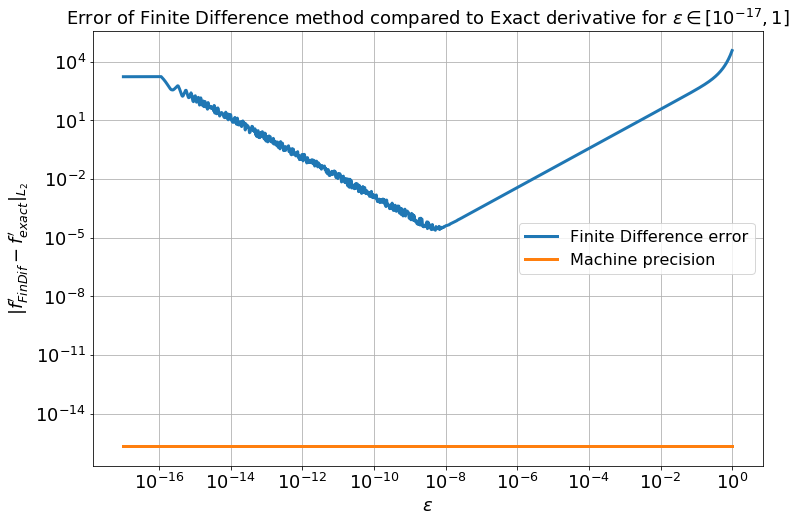

In [9]:
# Load libraries that we'll need
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    # Hard-coded f(x)
    return np.exp(x**2)
    
def dfdx(x):
    # Hard-coded Jacobian of f(x)
    return 2*x*np.exp(x**2)

def dfdx_h(x, epsilon):
    # Finite difference
    return (f(x + epsilon) - f(x)) / epsilon

x = np.linspace(-2, 2, 1000) # Define domain
eps = np.logspace(-17, 0, 1000) # Define \epsilon domain

err = np.zeros(len(eps))
# Loop over epsilons
for idx, e in enumerate(eps):
    df_err = dfdx_h(x,e) - dfdx(x) # Compute error between FD and analytical at each point
    err[idx] = np.linalg.norm(df_err) # Store error as L2 norm

# Make a log-log plot of the error
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(eps, err, lw=3, label='Finite Difference error')
ax.plot(eps, np.ones(eps.shape)*np.finfo(float).eps,lw=3, label='Machine precision' )
fontsize=18
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\epsilon$', fontsize=18)
ax.set_ylabel(r'$\| f^{\prime}_{FinDif} - f^{\prime}_{exact}\|_{L_{2}}$', fontsize=18)
ax.tick_params(labelsize=18)
ax.grid()
ax.legend(fontsize=16)
ax.set_title(r'Error of Finite Difference method compared to Exact derivative for $\epsilon \in [10^{-17},1]$', fontsize=18)

# Print out minimum error
print(r"The minimum error: {:17.16e}".format(err.min()))
print(r"The minimum was obtained at epsilon = {:17.16e}.".format(eps[err==err.min()][0]))
print(r"Machine precision is {:17.16e}".format(np.finfo(float).eps))
print(r"Ratio (Minimum error / Machine precision): {:17.16e}".format(err.min()/np.finfo(float).eps))

We observe that the smalles difference between finite difference estimations and the exact derivative we can obtain is $10^{-5}$. This is as calculated $100,000,000,000$ our machine precision error! When $\epsilon$ decreases to values below $\sqrt{\epsilon_{\text{machine}}}=\sqrt{10^{-16}}=10^{-8}$ the amplification from floating point errors will clutter our finite difference error since both numerator and denominator are becoming increasingly very small.

 - **Summary why using AD and not Symbolic differentiation or Numerical differentiation?**
   - **Symbolic differentation** for higher order derivates can be very laborious when done manually, and if use a computer we can not always hold the promise of a small computational cost.
   - **Numerical differentiation** or finite differences introduces round-off errors and thus not holding the promise of a derivative calculation precise to machine precision, suffering from accuracy and stability problems <sup>[3](#myfootnote3)</sup>.

#### References 
* [A Hitchhiker’s Guide to Automatic Differentiation](https://link.springer.com/article/10.1007/s11075-015-0067-6)
* Griewank, A. and Walther, A., 2008. Evaluating derivatives: principles and techniques of algorithmic differentiation (Vol. 105). Siam.
* <a name="myfootnote1">1</a>: Baydin, Atilim Gunes; Pearlmutter, Barak; Radul, Alexey Andreyevich; Siskind, Jeffrey (2018). "Automatic differentiation in machine learning: a survey". Journal of Machine Learning Research. 18: 1–43.
* <a name="myfootnote2">2</a>: From Wikipedia, the free encyclopedia; [Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation#cite_note-baydin2018automatic-2)
* <a name="myfootnote3">3</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 9 of October 2nd, 2018.
* <a name="myfootnote4">4</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 10 of October 4nd, 2018.
* <a name="myfootnote5">5</a>: [Chapter 6 Symbolic Differentiation](http://homepage.divms.uiowa.edu/~stroyan/CTLC3rdEd/3rdCTLCText/Chapters/ch6.pdf)

**Brief mathematical background**

The essential mathematical ideas behind AD are 1. *The Chain Rule*, 2. *Computatinoal Graphs of Elemntary Functions*, and 3. *Forward mode Automatic Differentiation*, and 4. Dual Numbers.


 1. **The Foundation of AD: The Chain Rule**: 
 
 The foundation for Automatic Differentiation constitutes of the chain rule, that computes the derivative of the composition of two or more functions. If $f$ and $g$ are functions, then the chain rule expresses the derivative of their composition $F=f \circ  g$ ($f$ applied to the output of $g(x)$, AKA $f$ after $g$, that maps $x$ to $F(x)=f(g(x))$) in terms of the derivatives of $f$ and $g$ and the product of function as follows: <sup>[6](#myfootnote6)</sup>
 $$ F^{'}=(f\circ g)^{'}=(f'\circ g)\dot g^{'}$$
 $$ F^{'}(x)=f'(g(x))g^{'}(x)$$

  - **The univariate function $f(g(x))$:** given the function $f(g(x))$ with $x\in\mathbb{R}$ and we want the derivative of $f$ with respect to $x$, the chain rule states <sup>[3](#myfootnote3)</sup> 
:
$$\dfrac{\partial f}{\partial x} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial x}$$  
  - **The multi-variate functino $f(g(x),h(x))$:** when the function has multiple arguments (e.g. $g(x), h(x)$) the chain rule states <sup>[3](#myfootnote3)</sup>
:  
$$\dfrac{\partial f}{\partial x} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial x}+ \dfrac{\partial f}{\partial h}\dfrac{\partial h}{\partial x}$$ 
  - **General rule:** we can generalize the case by introducing the notion of gradiant and replacing the scalar x by a vector $x\in\mathbb{R}^m$. Now $f$ is a function of possibly $n$ other functions themselves a function of $m$ variables. The gradient of $f$ is now given by: <sup>[3](#myfootnote3)</sup> 
\begin{align}
  \nabla_{x}f = \sum_{i=1}^{n}{\frac{\partial f}{\partial y_{i}}\nabla y_{i}\left(x\right)}.
\end{align}

 What this general rule implies that for any multivariate function composed of sub-function, the the derivative or gradiant is just the sum of the multiplication of the partial derivatives and its gradiants of the sub-functions. If program can compute any given sub-function as well as the partial derivative of any sub-functions, the calculation of the derivative can be reduced to a sum and products.
 
 
 2. **Computatinoal Graphs of Elemntary Functions**
  
 Circling back to our introduction: AD exploits the idea that every computer program, no matter how complicated, just execute a sequence of elementary arithmetic operations (addition, subtraction, multiplicaiton, division, etc.) and elementary function (exp, log, sin, cos, etc.). Since we know the partial derivatives of all these elementary operations and elementary functions we can use the general rule for any function composed of sub-function to calculate the exact derivative or gradiant.
 
 *The reduction of a complex model to elementary operations* is formalised by the concept of *computational graphs*. The basic idea in a computational graph is to express some model as a directed graph expressing a sequence of computational steps. Each step in the sequence corresponds to a vertex in the computational graph; each step corresponds to a elementary operation that takes some inputs and produces some output as a function of its inputs. <sup>[7](#myfootnote7)</sup> Once the graph has been defined using underlying primitive operations, AD calculates derivatives automatically based on “local” derivatives of these operations and puts everything together by using the general rule.
 
 Consider again the example function: $$f(x) = \exp(x^2)=\exp( ( x^2 )) $$ The computational graph looks like:
 ![comp-graph](figs/graph.png)
 
 
 3. **Forward mode AD**
  
 So now we have reduced our complex function to a forward direct graph of elementary functions and operations we can execut **Forward mode AD**: We start at the input variable x and at each evaluation step, we also evaluate the derivative with the chain rule. Therefore, if our function $f(x)$ is composed of elementary functions for which we know the partial derivatives, it is a simple task to compute the derivative as we show here in the example of evaluating the derivative at $x=5$ of $$f(x) = \exp(x^2)=\exp( ( x^2 )) $$
 

 | Trace    | Elementary Operation &nbsp;&nbsp;&nbsp;| Derivative &nbsp;&nbsp;&nbsp; | $\left(f\left(a\right),  f^{\prime}\left(a\right)\right)$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :------: | :----------------------:               | :------------------------------: | :------------------------------: |
| $x_{1}$  | $3$                      | $1$                | $\left(3, 1\right)$ |
| $x_{2}$  | $x_{1}^2$                               | $2x_1\times {x}_{1}$                 | $\left(x_{1}^2=3^2=9, \\  2x_1\times {x}_{1}=2\times 3\times 1\right)\\=(9,6)$ |
| $x_{3}$  | $\exp\left(x_{2}\right)$               | $\exp\left(x_{2}\right)\times {x}_{2}$           | $\left(\exp\left(x_{2}\right)=e^9, \\ \exp\left(x_{2}\right)\times {x}_{2}=e^9\times 6\right)\\=(e^9, 6\times e^9)$ |

  There are two modes of AD: reverse and forward mode. 
 - *Forward mode* performs differentiation starting our evaluation on the graph at the independent input variable.
 - *Reverse mode* calculates differentation starting at the dependent output variable. 
 This project will foccus on the forward mode but the reverse mode might be introduced in the end if possible time-whise. Why? This might be explained becaues the reverse mode cannot be interpreted in the context of dual numbers (see paragraph below). <sup>[4](#myfootnote4)</sup> 
 
 
 4. **Dual numbers**

A last concept to introduce are Dual numbers. A dual number has a real part and a dual part.  We write $$z = x + \epsilon x^{\prime}$$ and refer to $x^{\prime}$ as the dual part.  We *define* the number $\epsilon$ so that $\epsilon^{2} = 0$. <sup>[4](#myfootnote4)</sup> 

Let's now evaluate the evaluate a function $f$ using a dual number $x$ as the input, rewriting the expression as a Taylor expansion, and using the property of nilpotency of epsilon: $\epsilon^2 =0 $ and $\epsilon^3=\epsilon^2\times \epsilon=0 $:

\begin{align*}
  f(x + a) &=  f(x) + f^{\prime}(x)a + f^{\prime\prime}(x)\dfrac{a^2}{2!}+ f^{\prime\prime\prime}(x)\dfrac{a^3}{3!} +...  \\
  f(x + x^{\prime}\epsilon) &=  f(x) + f^{\prime}(x)x^{\prime}\epsilon + f^{\prime\prime}(x) \dfrac{x^{\prime2}\epsilon^2}{2!} + f^{\prime\prime\prime}(x) \dfrac{x^{\prime3}\epsilon^3}{3!}...  \\ 
  f(x + x^{\prime}\epsilon) &=  f(x) + f^{\prime}(x)x^{\prime}\epsilon  \\
\end{align*}

We will use dual numbers indirectly in our implementation of AD since evaluating our function f on a dual number returns a value $f(x + x^{\prime}\epsilon)$ constituting of:
1. a real part: the function evaluate at the real part of x
2. a dual part: the derivative function evaluated at the real part of x

As we look back at our table above we observe that our last column is exactly this tuple $(f(x),f^{\prime}(x))$. 

#### References  
* <a name="myfootnote3">3</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 9 of October 2nd, 2018.
* <a name="myfootnote4">4</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 10 of October 4nd, 2018.
* <a name="myfootnote1">6</a>: From Wikipedia, the free encyclopedia; [The Chain Rule](https://en.wikipedia.org/wiki/Chain_rule)
* <a name="myfootnote1">7</a>: Computational Graphs, and Backpropagation ([Course Notes](http://www.cs.columbia.edu/~mcollins/ff2.pdf) for NLP by Michael Collins, Columbia University) 

### How to Use AD
How do you envision that a user will interact with your package?  What should they import?  How can
they instantiate AD objects?

The user should type the following commands in the python:
```python
>>> import AD as grad         # Import module
>>> f='e^(x^2)+y'             # Create a function. Can also handle vector functions: f = '2*x*y,x^2' varlist=[x,y]
>>> varlist=[x,y]             # Define list of variables in f
>>> AD_obj=grad(f,varlist)    # Instatiate AD object ( if grad(f,varlist) can't parse f as a valid function raise exception)
>>> AD_obj([1.0,2])           # Calculate the automatic differentation at x=1.0 and y=2.0 (only if len(list)=len(varlist))
```

**Note: This section should be a mix of pseudo code and text.  It should not include any actual
operations yet.**

### Software Organization
Discuss how you plan on organizing your software package.
* Directory Structure:
home_directory
  - AD 
    - AST_builder/parser
    - Differentiator
    - Interface
  - Tests
    - AST_builder/parser test
    - Differentiator test
    - Interface test
  - Documention
  - Examples
  
* What modules do you plan on including?  What is their basic functionality?
  - We will use and expand a parser from "https://ruslanspivak.com/lsbasi-part7/". Currently, this parser only handles parsing and evaluating basic arithmetic operations with numbers. We will also use Numpy and Math for evaluating formulas.

* Where will your test suite live?  Will you use `TravisCI`? `Coveralls`?
  - The test suite will receide in the Test sub-directory: both `TravisCI` and `Coveralls` will be used.
  
* How will you distribute your package (e.g. `PyPI`)?
  - We will distribute the package through `PyPI`

### Implementation
Discuss how you plan on implementing the forward mode of automatic differentiation.
* What are the core data structures?
  - We will be basing our formula parser on the above cited basic arithmetic formula parser. The code will create a formula data structure that will encode the user's input as an abstract syntax tree for ease of evaluation and differentiation.
* What classes will you implement?
  - The formula parser only supports basic arithmetic operations, so we will enrich the code with additional features: We will add support for parsing and evaluating variables and vectors. This will be a significant change from the current code as tese are new types of value tokens that need to be handled. We will also add unary operations for trigonometric functions and include pow(a,b) in the binary operations class.
* What method and name attributes will your classes have?
  - For the formula itself, we need to store the input text and the input variables.
  - For formula evaluation, we will need a parse method to first process the inputs. Then we will need another method that will take in a point for evaluation / differentiation. After these inputs are given, we can call eval or diff to get the value or derivative at the current, stored point.
* What external dependencies will you rely on?
  - As mentioned above, we will be using "https://ruslanspivak.com/lsbasi-part7/" as the basis for our parser code and evaluation code. We will also be using Math and Numpy to evaluate formulas and derivatives.
* How will you deal with elementary functions like `sin` and `exp`?
  - Basic trigonometric functions will be implemented as a unary operator in our abstract syntax tree. Their evaluation and differentiation will be coded in eval and diff using Numpy and or Math. Exp can be computed as pow(e, value). We will need to encode certain constants such as e and pi as protected names (ie. you can't have a variable called 'e' or 'pi')
  
### High Level Overview of Formulas:
* Abstract Syntax Tree Grammar
  - Value
    - VARIABLES (varnames can only be alphanumeric, e and pi are protected names)
    - FLOATS
  - BinOp
    - ADD
    - MINUS
    - MUL
    - DIV
    - POW
  - UnOp
    - SIN
    - COS
    - TAN
    - LOG
    
Note: Things enclosed in a parentheses will be parsed as a token. 

Be sure to consider a variety of use cases.  For example, don't limit your design to scalar
functions of scalar values.  Make sure you can handle the situations of vector functions of vectors and
scalar functions of vectors.  Don't forget that people will want to use your library in algorithms
like Newton's method (among others).